# Daria Bromot - FS500047

## IMDB movies dataset

In this assignment, you will analyze data on movies from the website IMDB.com.
Data is available for download from this link - https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset

Import the relevant packages:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

Import the dataset:

In [2]:
data = pd.read_csv('movie_metadata.csv')

How many records and columns were imported?

In [3]:
data.shape

(5043, 28)

Show the first 5 rows:

In [4]:
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Let's study which columns have missing values. First, show a heatmap of columns with missing values.  
Note that for better visibility, we transpose the matrix so that the column names become the rows in the heatmap, using the `.T` operator.

<AxesSubplot:>

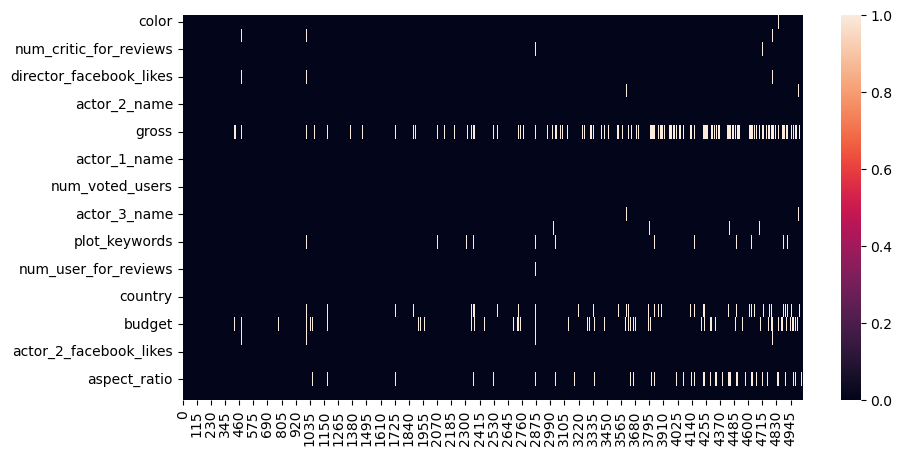

In [5]:
sns.heatmap(data.isnull().T.astype(int))

We can also review the number of missing values as a Series - sort the values using `sort_values()`

In [6]:
data.isnull().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

For movies released since 1990, do Color movies make more money than Black and White ones?

In [7]:
# Group the movies by their color format and calculate the mean revenue for each group
color_revenue = data[data['title_year'] >= 1990].groupby('color')['gross'].mean()

# Print the mean revenue for Color and Black and White movies
print("Mean revenue for Color movies: $", color_revenue['Color'])
print("Mean revenue for Black and White movies: $", color_revenue[' Black and White'])

Mean revenue for Color movies: $ 48506003.54811828
Mean revenue for Black and White movies: $ 36857720.298245616


<AxesSubplot:xlabel='color', ylabel='gross'>

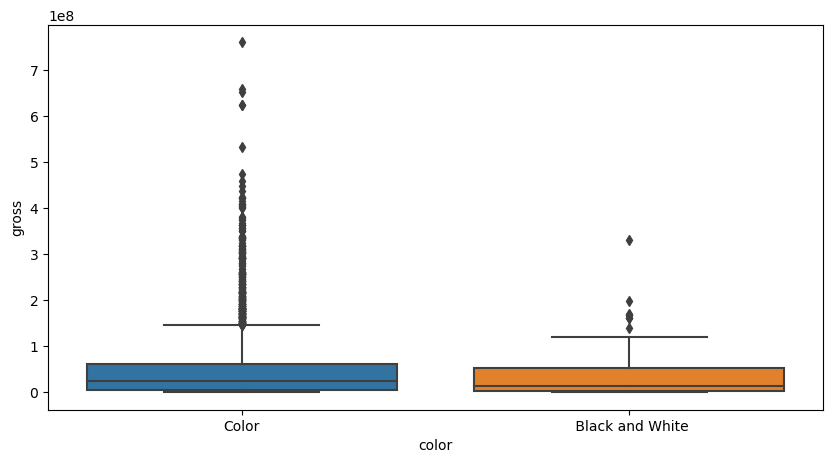

In [8]:
sns.boxplot(data=data[data.title_year>=1990 ], x='color', y='gross')

It's hard to see the values here, so let's show the Y axis in Millions of Dollars and zoom the Y-axis to 0-200.

(0.0, 200.0)

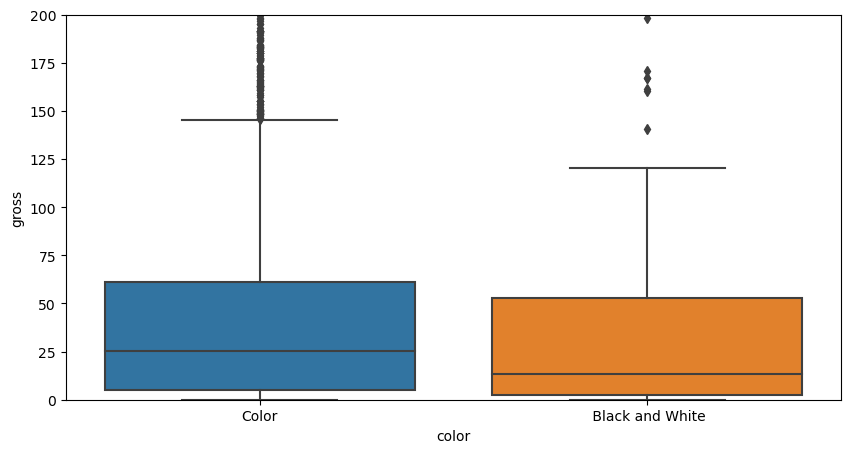

In [9]:
sns.boxplot(data=data[data.title_year>=1990 ], x='color', y=data['gross']/1e6)
plt.ylim((0,200))

Show the 5 directors that have the highest movie rating and at least 30% of their movies are in Black and White.

In [10]:
# Add a new column to indicate whether each movie is in black and white
data['is_bw'] = (data['color'] == ' Black and White').astype(int)

# Calculate the average movie rating and the proportion of black and white movies for each director
director_stats = data.groupby('director_name').agg({ 'is_bw': 'mean', 'imdb_score': 'mean'})

# Filter the directors with at least 30% of their movies in black and white, and sort by average movie rating
bw_directors = director_stats[director_stats['is_bw'] >= 0.3].sort_values('imdb_score', ascending=False)

# Display the top 5 directors
bw_directors.head(5)

,is_bw,imdb_score
director_name,,
Charles Chaplin,1.0,8.6
Robert Mulligan,1.0,8.4
Moustapha Akkad,1.0,8.4
Fritz Lang,1.0,8.3
Michael Roemer,1.0,8.1


Let's compute a `decade` folder:

In [11]:
data['decade_folder'] = (data['title_year'] // 10) * 10
data['decade_folder']

0       2000.0
1       2000.0
2       2010.0
3       2010.0
4          NaN
         ...  
5038    2010.0
5039       NaN
5040    2010.0
5041    2010.0
5042    2000.0
Name: decade_folder, Length: 5043, dtype: float64

For each decade, show the 5 directors who made the highest gross revenues (i.e. the directors whose movies, summed together, had the highest gross revenues).

In [12]:
data['gross_1e6']=data['gross']/1e6
# Group the movies by decade and by director, and calculate the total gross revenues for each director in each decade
director_revenues = data.groupby(['decade_folder', 'director_name'])['gross_1e6'].sum()

# Find the top 5 directors by total gross revenues for each decade
for decade in range(1910, 2020, 10):
    decade_directors = director_revenues.loc[decade].sort_values(ascending=False)[:5]
    print(f"Top 5 directors for the {decade}s:")
    print(decade_directors)
    print()

Top 5 directors for the 1910s:
director_name
D.W. Griffith    0.0
Name: gross_1e6, dtype: float64

Top 5 directors for the 1920s:
director_name
Harry F. Millarde      3.000000
Harry Beaumont         2.808000
Fritz Lang             0.026435
Georg Wilhelm Pabst    0.009950
King Vidor             0.000000
Name: gross_1e6, dtype: float64

Top 5 directors for the 1930s:
director_name
Victor Fleming      220.857890
William Cottrell    184.925485
Mark Sandrich         3.000000
Lloyd Bacon           2.300000
Charles Chaplin       0.163245
Name: gross_1e6, dtype: float64

Top 5 directors for the 1940s:
director_name
James Algar          179.19715
Norman Ferguson       84.30000
William Wyler         23.65000
King Vidor            20.40000
Vincente Minnelli      2.95600
Name: gross_1e6, dtype: float64

Top 5 directors for the 1950s:
director_name
Cecil B. DeMille    36.0
Henry Koster        36.0
David Lean          27.2
Billy Wilder        25.0
Elia Kazan           9.6
Name: gross_1e6, dtype: flo

In [13]:
director_decade = data.groupby(['decade_folder', 'director_name'])['gross_1e6'].sum().reset_index().sort_values(['decade_folder', 'gross_1e6'], ascending=[True, False])
director_decade.groupby('decade_folder').head(5)

,decade_folder,director_name,gross_1e6
0,1910.0,D.W. Griffith,0.000000
4,1920.0,Harry F. Millarde,3.000000
3,1920.0,Harry Beaumont,2.808000
1,1920.0,Fritz Lang,0.026435
2,1920.0,Georg Wilhelm Pabst,0.009950
5,1920.0,King Vidor,0.000000
16,1930.0,Victor Fleming,220.857890
17,1930.0,William Cottrell,184.925485
14,1930.0,Mark Sandrich,3.000000
12,1930.0,Lloyd Bacon,2.300000


Do short movies (50-70 minutes) tend to get higher or lower rating than medium length (80-110 minutes) and long movies (130-200 minutes)?  

First, write a function that returns the labels `'short'`, `'medium'`, `'long'` or `None` for a row based on its duration. Then use `apply()` to create a new column called `movie_duration_group`.

In [14]:
# Define a function to categorize movies based on duration
def categorize_duration(duration):
    if duration >= 50 and duration <= 70:
        return 'short'
    elif duration >= 80 and duration <= 110:
        return 'medium'
    elif duration >= 130 and duration <= 200:
        return 'long'
    else:
        return None

# Use apply() to create a new column called movie_duration_group
data['movie_duration_group'] = data['duration'].apply(categorize_duration)

<AxesSubplot:xlabel='movie_duration_group', ylabel='gross'>

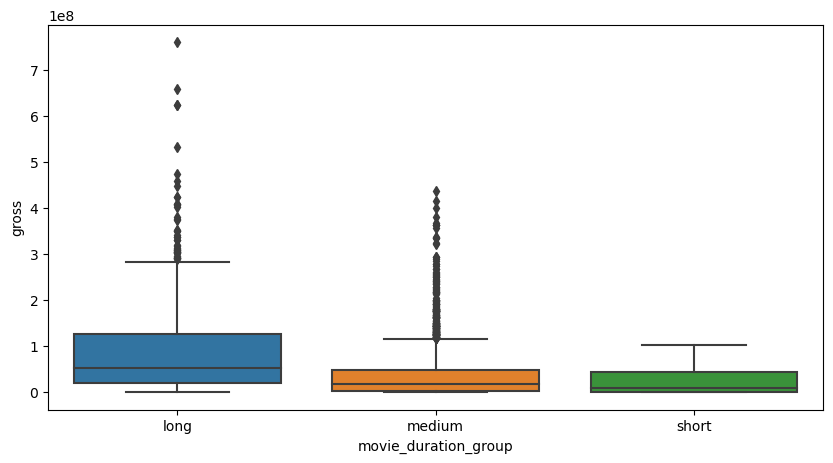

In [15]:
sns.boxplot(data=data, x='movie_duration_group', y='gross')

Is there a correlation between the number of words in a movie's title and its success in the box office, its rating, or its duration?

In [16]:
# Calculate the number of words in each movie title and add it as a new column
data['title_word_count'] = data['movie_title'].apply(lambda x: len(x.split()))
data[['movie_title', 'title_word_count']].head()

,movie_title,title_word_count
0,Avatar,1
1,Pirates of the Caribbean: At World's End,7
2,Spectre,1
3,The Dark Knight Rises,4
4,Star Wars: Episode VII - The Force Awakens ...,8


<AxesSubplot:xlabel='title_word_count', ylabel='gross'>

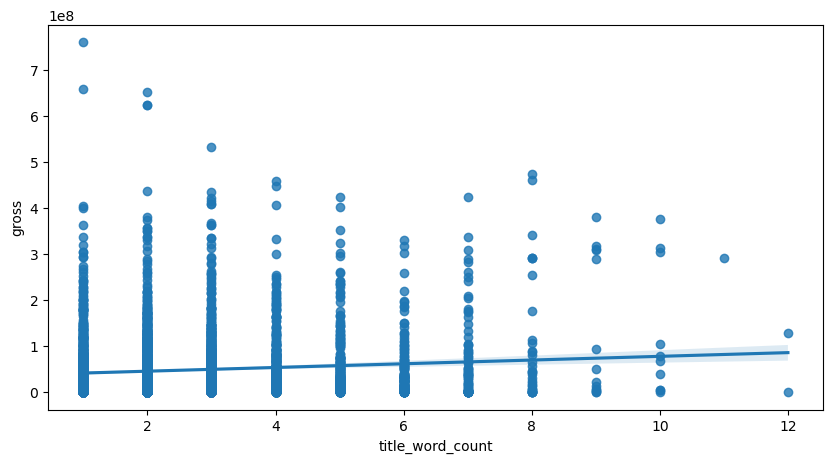

In [17]:
sns.regplot(data=data, x='title_word_count', y='gross')

<AxesSubplot:xlabel='title_word_count', ylabel='imdb_score'>

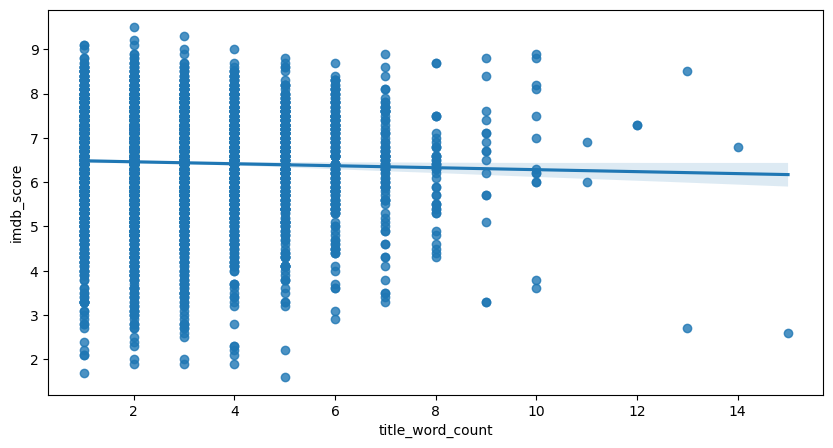

In [18]:
sns.regplot(data=data, x='title_word_count', y='imdb_score')

<AxesSubplot:xlabel='title_word_count', ylabel='duration'>

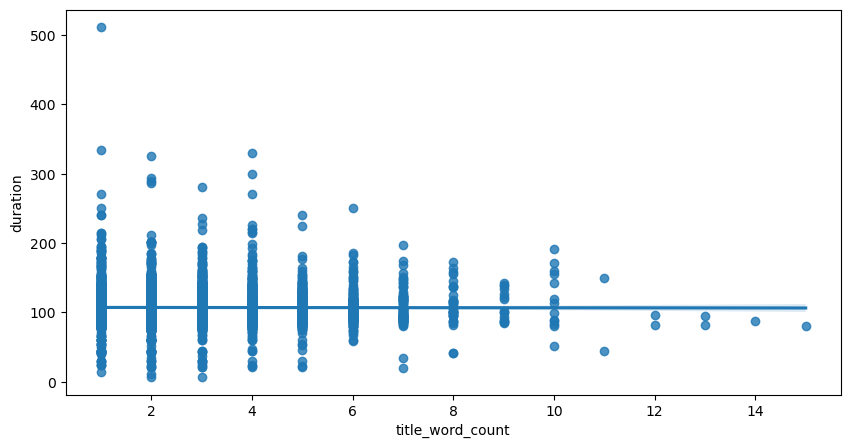

In [19]:
sns.regplot(data=data, x='title_word_count', y='duration')

What are the highest grossing genres?

Note that the genres column contains multiple genres. Let's first create a new dataframe, where each movie appears multiple times, with each of its genres. You can iterate over the rows of the dataframe, to create a new dataframe with the index of the movie and its genre (so there's a different row for each of the genres of a movie).

In [20]:
data_genres = data.assign(genres=data['genres'].str.split('|')).explode('genres')
data_genres = data_genres.reset_index()[['index', 'genres']]
data_genres.columns = ['index', 'genre']
data_genres = data_genres.set_index('index')
data_genres.head(5)

,genre
index,
0,Action
0,Adventure
0,Fantasy
0,Sci-Fi
1,Action


Next, use `pd.merge()` to merge the new dataframe that you've created (with a row for each genre) and the original dataframe that contains metadata about a movie.

In [21]:
merged_data = pd.merge(data, data_genres, left_index=True, right_index=True)
merged_data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_bw,decade_folder,gross_1e6,movie_duration_group,title_word_count,genre
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,936.0,7.9,1.78,33000,0,2000.0,760.505847,long,1,Action
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,936.0,7.9,1.78,33000,0,2000.0,760.505847,long,1,Adventure
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,936.0,7.9,1.78,33000,0,2000.0,760.505847,long,1,Fantasy
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,936.0,7.9,1.78,33000,0,2000.0,760.505847,long,1,Sci-Fi
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,5000.0,7.1,2.35,0,0,2000.0,309.404152,long,7,Action


Now you can compute the average gross value for each genre, in $M.

In [22]:
genre_mean_gross = merged_data.groupby('genre')['gross'].mean() / 1e6
genre_mean_gross.sort_values(ascending=False, inplace=True)
genre_mean_gross

genre
Animation      106.954239
Adventure       98.405188
Family          89.302305
Fantasy         85.447070
Sci-Fi          82.244106
Action          76.289889
Musical         53.146879
Comedy          47.683480
Thriller        46.890572
Mystery         44.445346
Romance         41.825587
Sport           41.392510
Western         39.306668
War             38.317142
Crime           37.154454
History         35.193409
Music           34.626114
Drama           34.538927
Biography       34.372729
Horror          33.561594
News            14.359793
Documentary     12.121445
Short            3.926267
Film-Noir        0.007927
Game-Show             NaN
Reality-TV            NaN
Name: gross, dtype: float64

What year was the best year for movies in terms of rating? of gross revenues? What are the top 5 movies from that year?

In [23]:
yearly_mean_rating = data.groupby('title_year')['imdb_score'].mean().sort_values(ascending=False)
best_rating_year = yearly_mean_rating.idxmax()
print(f"The best year for movies in terms of rating was {best_rating_year} with an average rating of {yearly_mean_rating[best_rating_year]:.2f}")

The best year for movies in terms of rating was 1957.0 with an average rating of 8.55


In [24]:
yearly_mean_rating.head(5)

title_year
1957.0    8.550000
1925.0    8.300000
1927.0    8.300000
1960.0    8.233333
1934.0    8.200000
Name: imdb_score, dtype: float64

In [25]:
best_rating_movies = data[data['title_year'] == best_rating_year].sort_values(by='imdb_score', ascending=False).head(5)
print(f"The top 5 movies from the best year for rating ({best_rating_year}) are:")
print(best_rating_movies[['movie_title']])

The top 5 movies from the best year for rating (1957.0) are:
                        movie_title
4822                  12 Angry Men 
4066  The Bridge on the River Kwai 


In [28]:
yearly_gross_revenues = data.groupby('title_year')['gross'].mean().sort_values(ascending=False)
best_gross_year = yearly_gross_revenues.idxmax()
print(f"The best year for movies in terms of gross revenues was {best_gross_year} with total gross revenues of ${yearly_gross_revenues[best_gross_year]/1e6:.2f} million")

The best year for movies in terms of gross revenues was 1937.0 with total gross revenues of $184.93 million


In [29]:
yearly_gross_revenues.head(5)

title_year
1937.0    1.849255e+08
1975.0    1.244097e+08
1939.0    1.104289e+08
1977.0    1.062908e+08
1973.0    1.029195e+08
Name: gross, dtype: float64

In [30]:
best_gross_movies = data[data['title_year'] == best_gross_year].sort_values(by='gross', ascending=False).head(5)
print(f"The top 5 movies from the best year for gross revenues ({best_gross_year}) are:")
print(best_gross_movies[['movie_title']])

The top 5 movies from the best year for gross revenues (1937.0) are:
                           movie_title
4449  Snow White and the Seven Dwarfs 
2904            The Prisoner of Zenda 


What movie genres tend to re-occur?

To solve this, use the merged dataframe with a different row for each genre. Use the function `pd.crosstab` to create a matrix where each row is a movie, and the columns are the different genres. The values of the matrix will be 1 if the movie belongs to the genre and 0 otherwise.

In [31]:
genre_matrix = pd.crosstab(index=data_genres.index, columns=data_genres['genre'])
genre_matrix

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
row_0,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5039,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
5040,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Now you can compute the co-occurrence matrix using dot product on the matrix you've just created.

In [32]:
genre_coocurrence = genre_matrix.T.dot(genre_matrix)
genre_coocurrence

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
genre,,,,,,,,,,,,,,,,,,,,,
Action,1153,470,46,20,255,328,3,345,81,177,...,84,0,0,104,336,0,26,589,64,30
Adventure,470,923,169,22,311,49,4,242,290,285,...,53,0,0,112,262,1,13,224,41,30
Animation,46,169,242,3,172,6,1,32,205,115,...,8,0,0,20,51,0,6,8,4,3
Biography,20,22,3,293,29,48,15,275,8,3,...,1,0,0,56,0,0,44,32,31,6
Comedy,255,311,172,29,1872,254,14,663,358,251,...,47,0,1,589,158,2,70,133,20,17
Crime,328,49,6,48,254,889,8,526,16,15,...,157,1,0,97,27,0,6,548,6,14
Documentary,3,4,1,15,14,8,121,13,2,1,...,1,3,0,0,1,1,10,1,9,0
Drama,345,242,32,275,663,526,13,2594,139,156,...,260,1,1,737,149,0,124,697,190,56
Family,81,290,205,8,358,16,2,139,546,229,...,22,0,0,87,78,1,30,11,2,5


Show a heatmap of co-occurrences:

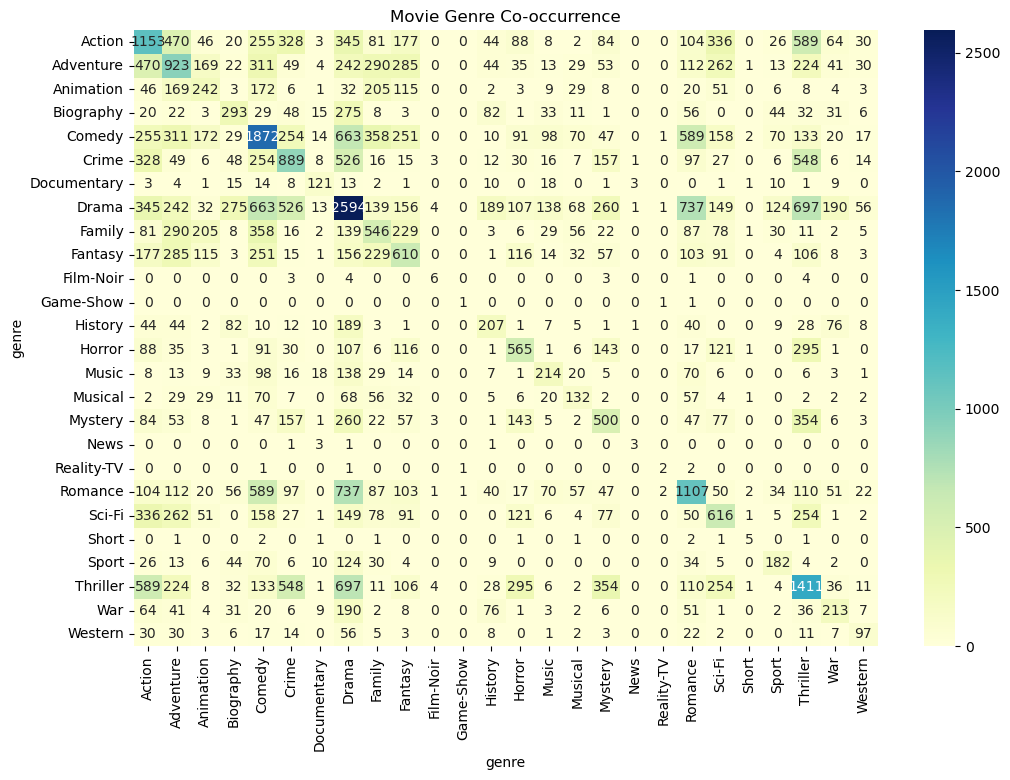

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(genre_coocurrence, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Movie Genre Co-occurrence')
plt.show()


<AxesSubplot:xlabel='genre', ylabel='genre'>

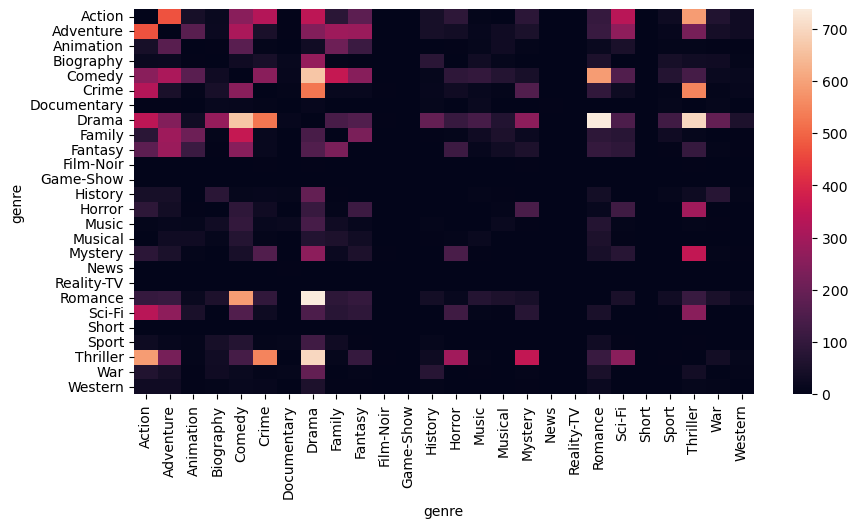

In [34]:
np.fill_diagonal(genre_coocurrence.values, 0)
sns.heatmap( genre_coocurrence )

Do movies actually become longer through the years, or is it just me?

Use the median. Show a boxplot for the decades, and a print of the values for each year.

<AxesSubplot:xlabel='decade_folder', ylabel='duration'>

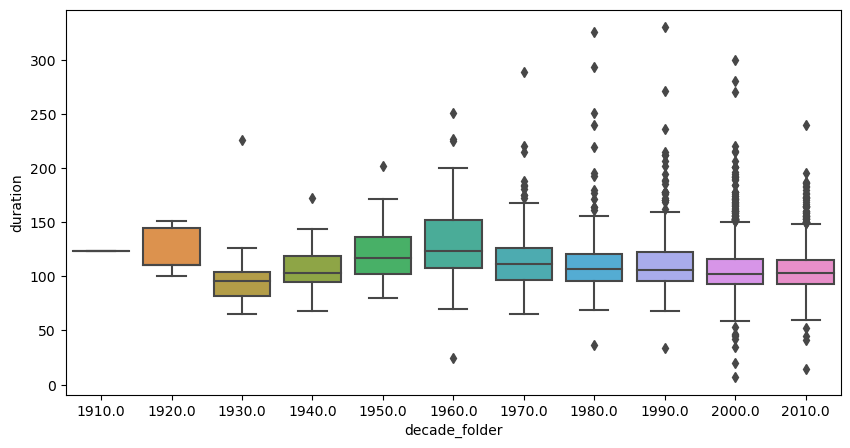

In [35]:
sns.boxplot(data=data, x='decade_folder', y='duration')

In [36]:
# Compute median movie length for each year
yearly_runtime = data.groupby('title_year')['duration'].median()

# Print median runtime for each year
print(yearly_runtime)

title_year
1916.0    123.0
1920.0    110.0
1925.0    151.0
1927.0    145.0
1929.0    105.0
          ...  
2012.0    101.0
2013.0    105.0
2014.0    102.0
2015.0    103.0
2016.0    107.5
Name: duration, Length: 91, dtype: float64


## Analyze this dataset - 
https://raw.githubusercontent.com/nirupamaprv/Investigate_Dataset/master/data_imdb.csv

In [37]:
df= pd.read_csv('https://raw.githubusercontent.com/nirupamaprv/Investigate_Dataset/master/data_imdb.csv')

In [38]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [39]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


**Study several different aspects of the time that you find interesting, e.g. the month, day of the month, day of the week etc.**

In [40]:
df['release_month'] = pd.to_datetime(df['release_date']).dt.month
df['release_day'] = pd.to_datetime(df['release_date']).dt.day
df['release_weekday'] = pd.to_datetime(df['release_date']).dt.weekday

#### Distribution of movies across months

Text(0.5, 1.0, 'Distribution of movies across months')

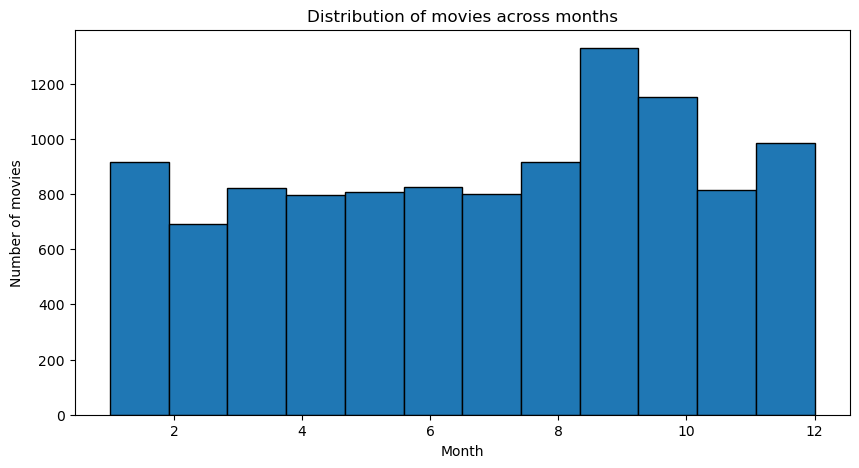

In [45]:
plt.hist(df['release_month'], bins=12, edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of movies')
plt.title('Distribution of movies across months')

#### Distribution of movies across days of the month

Text(0.5, 1.0, 'Distribution of movies across days of the month')

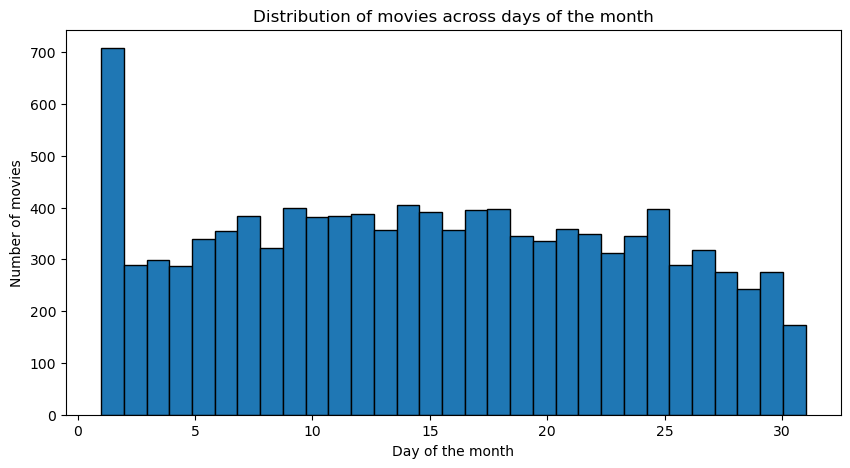

In [46]:
plt.hist(df['release_day'], bins=31, edgecolor='black')
plt.xlabel('Day of the month')
plt.ylabel('Number of movies')
plt.title('Distribution of movies across days of the month')

#### Distribution of movies across days of the week

Text(0.5, 1.0, 'Distribution of movies across days of the week')

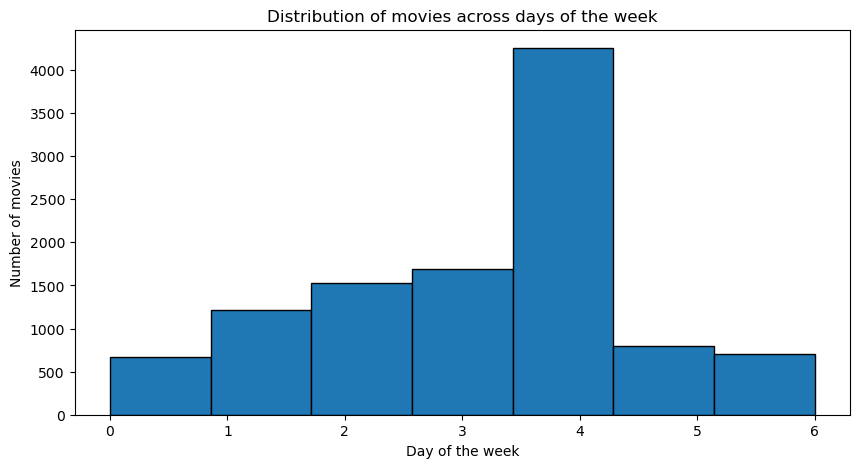

In [47]:
plt.hist(df['release_weekday'], bins=7, edgecolor='black')
plt.xlabel('Day of the week')
plt.ylabel('Number of movies')
plt.title('Distribution of movies across days of the week')

#### Popularity of movies across months

Text(0.5, 1.0, 'Popularity of movies across months')

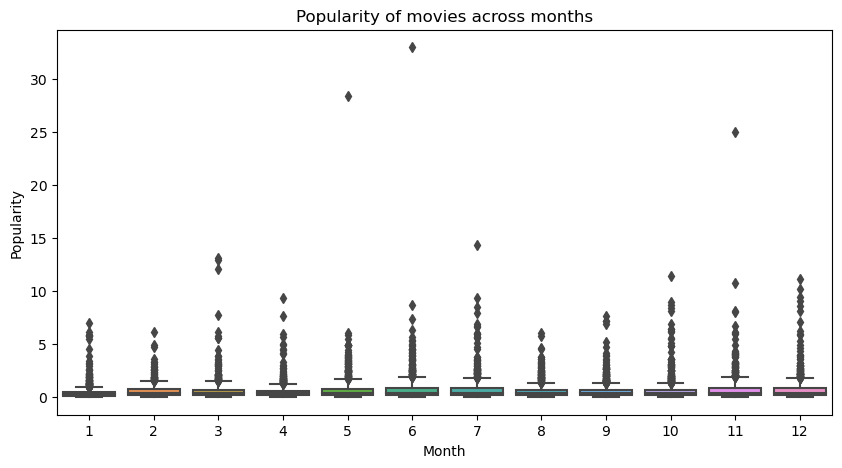

In [48]:
sns.boxplot(x='release_month', y='popularity', data=df)
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.title('Popularity of movies across months')

#### Revenue of movies across months

Text(0.5, 1.0, 'Revenue of movies across months')

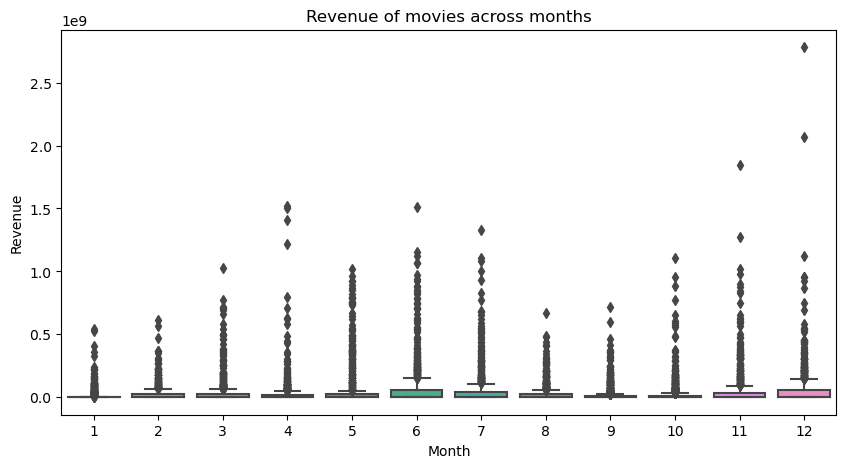

In [49]:
sns.boxplot(x='release_month', y='revenue', data=df)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue of movies across months')

#### Popularity of movies across days of the week

Text(0.5, 1.0, 'Popularity of movies across days of the week')

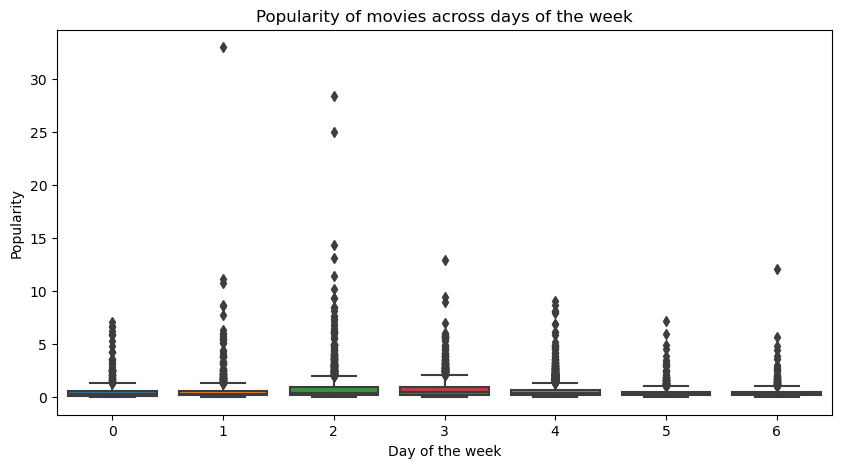

In [50]:
sns.boxplot(x='release_weekday', y='popularity', data=df)
plt.xlabel('Day of the week')
plt.ylabel('Popularity')
plt.title('Popularity of movies across days of the week')

#### Revenue of movies across days of the week

Text(0.5, 1.0, 'Revenue of movies across days of the week')

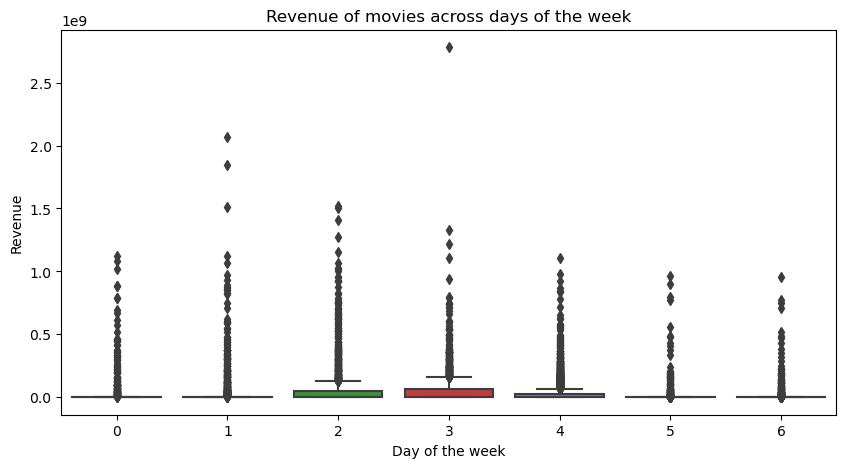

In [51]:
sns.boxplot(x='release_weekday', y='revenue', data=df)
plt.xlabel('Day of the week')
plt.ylabel('Revenue')
plt.title('Revenue of movies across days of the week')

**When is the best time of the year to release a movie?**

In [52]:
# Convert release_date column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the month from the release_date column and create a new column
df['release_month'] = df['release_date'].dt.month

# Group the data by release_month and calculate the average revenue for each month
monthly_revenue = df.groupby('release_month')['revenue'].mean()

# Print the average revenue for each month
print(monthly_revenue)

# Get the month with the highest average revenue
best_month = monthly_revenue.idxmax()

# Print the best month to release a movie based on the average revenue
print('The best month to release a movie is:', best_month)

release_month
1     1.417320e+07
2     2.864513e+07
3     3.819337e+07
4     3.311576e+07
5     6.236695e+07
6     7.455935e+07
7     5.679878e+07
8     2.778382e+07
9     1.936154e+07
10    2.550279e+07
11    5.638361e+07
12    5.915840e+07
Name: revenue, dtype: float64
The best month to release a movie is: 6


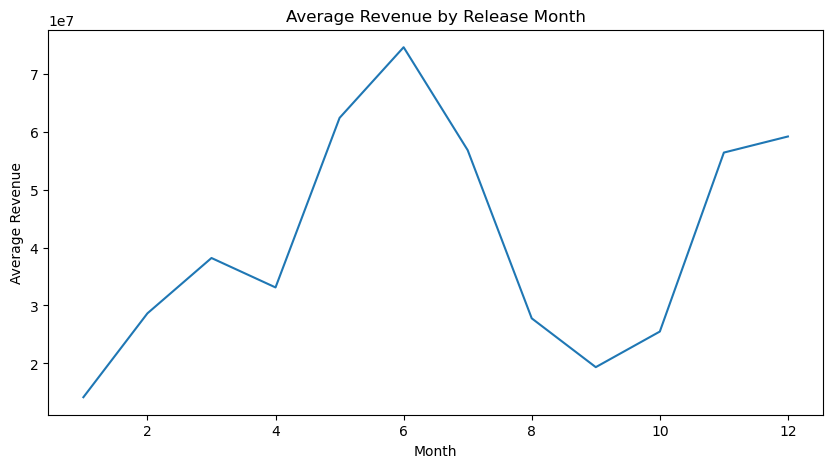

In [53]:
plt.plot(monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Release Month')
plt.show()

**Do different genres tend to be released in different times of the year?**

<AxesSubplot:xlabel='genres', ylabel='month'>

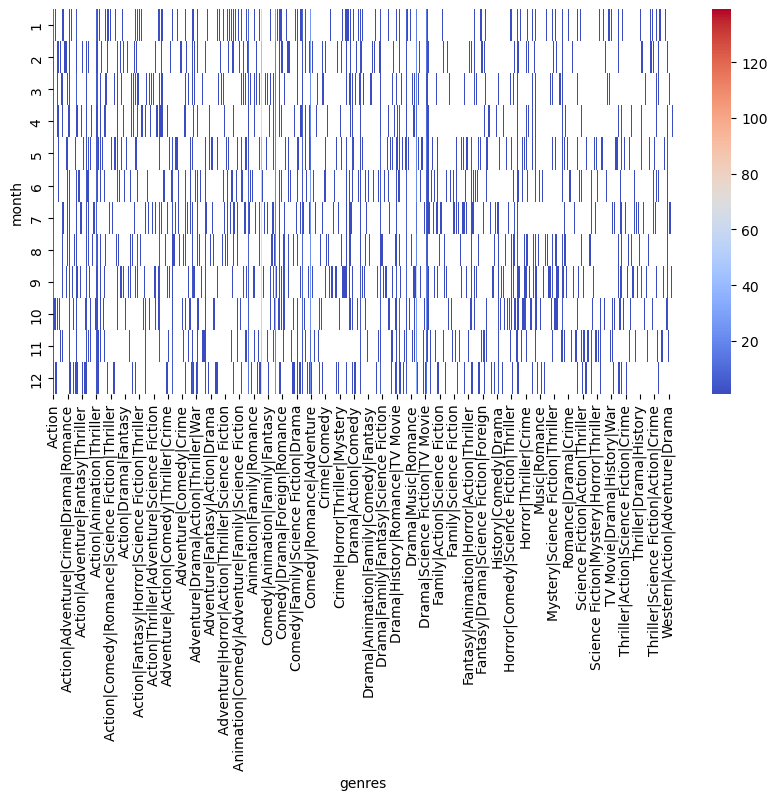

In [54]:
import pandas as pd
import seaborn as sns

# Convert the 'release_date' column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the month from the 'release_date' column
df['month'] = df['release_date'].dt.month

# Create a pivot table with month as the index, genres as the columns, and the count of movies released as the values
pivot_table = pd.pivot_table(df, index='month', columns='genres', values='id', aggfunc='count')

# Create a heatmap to visualize the pivot table
sns.heatmap(pivot_table, cmap='coolwarm')


In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Build a regressor that tries to rating of a movie from the other parameters. Assess the performance of your model and analyze where it tends to fail.**



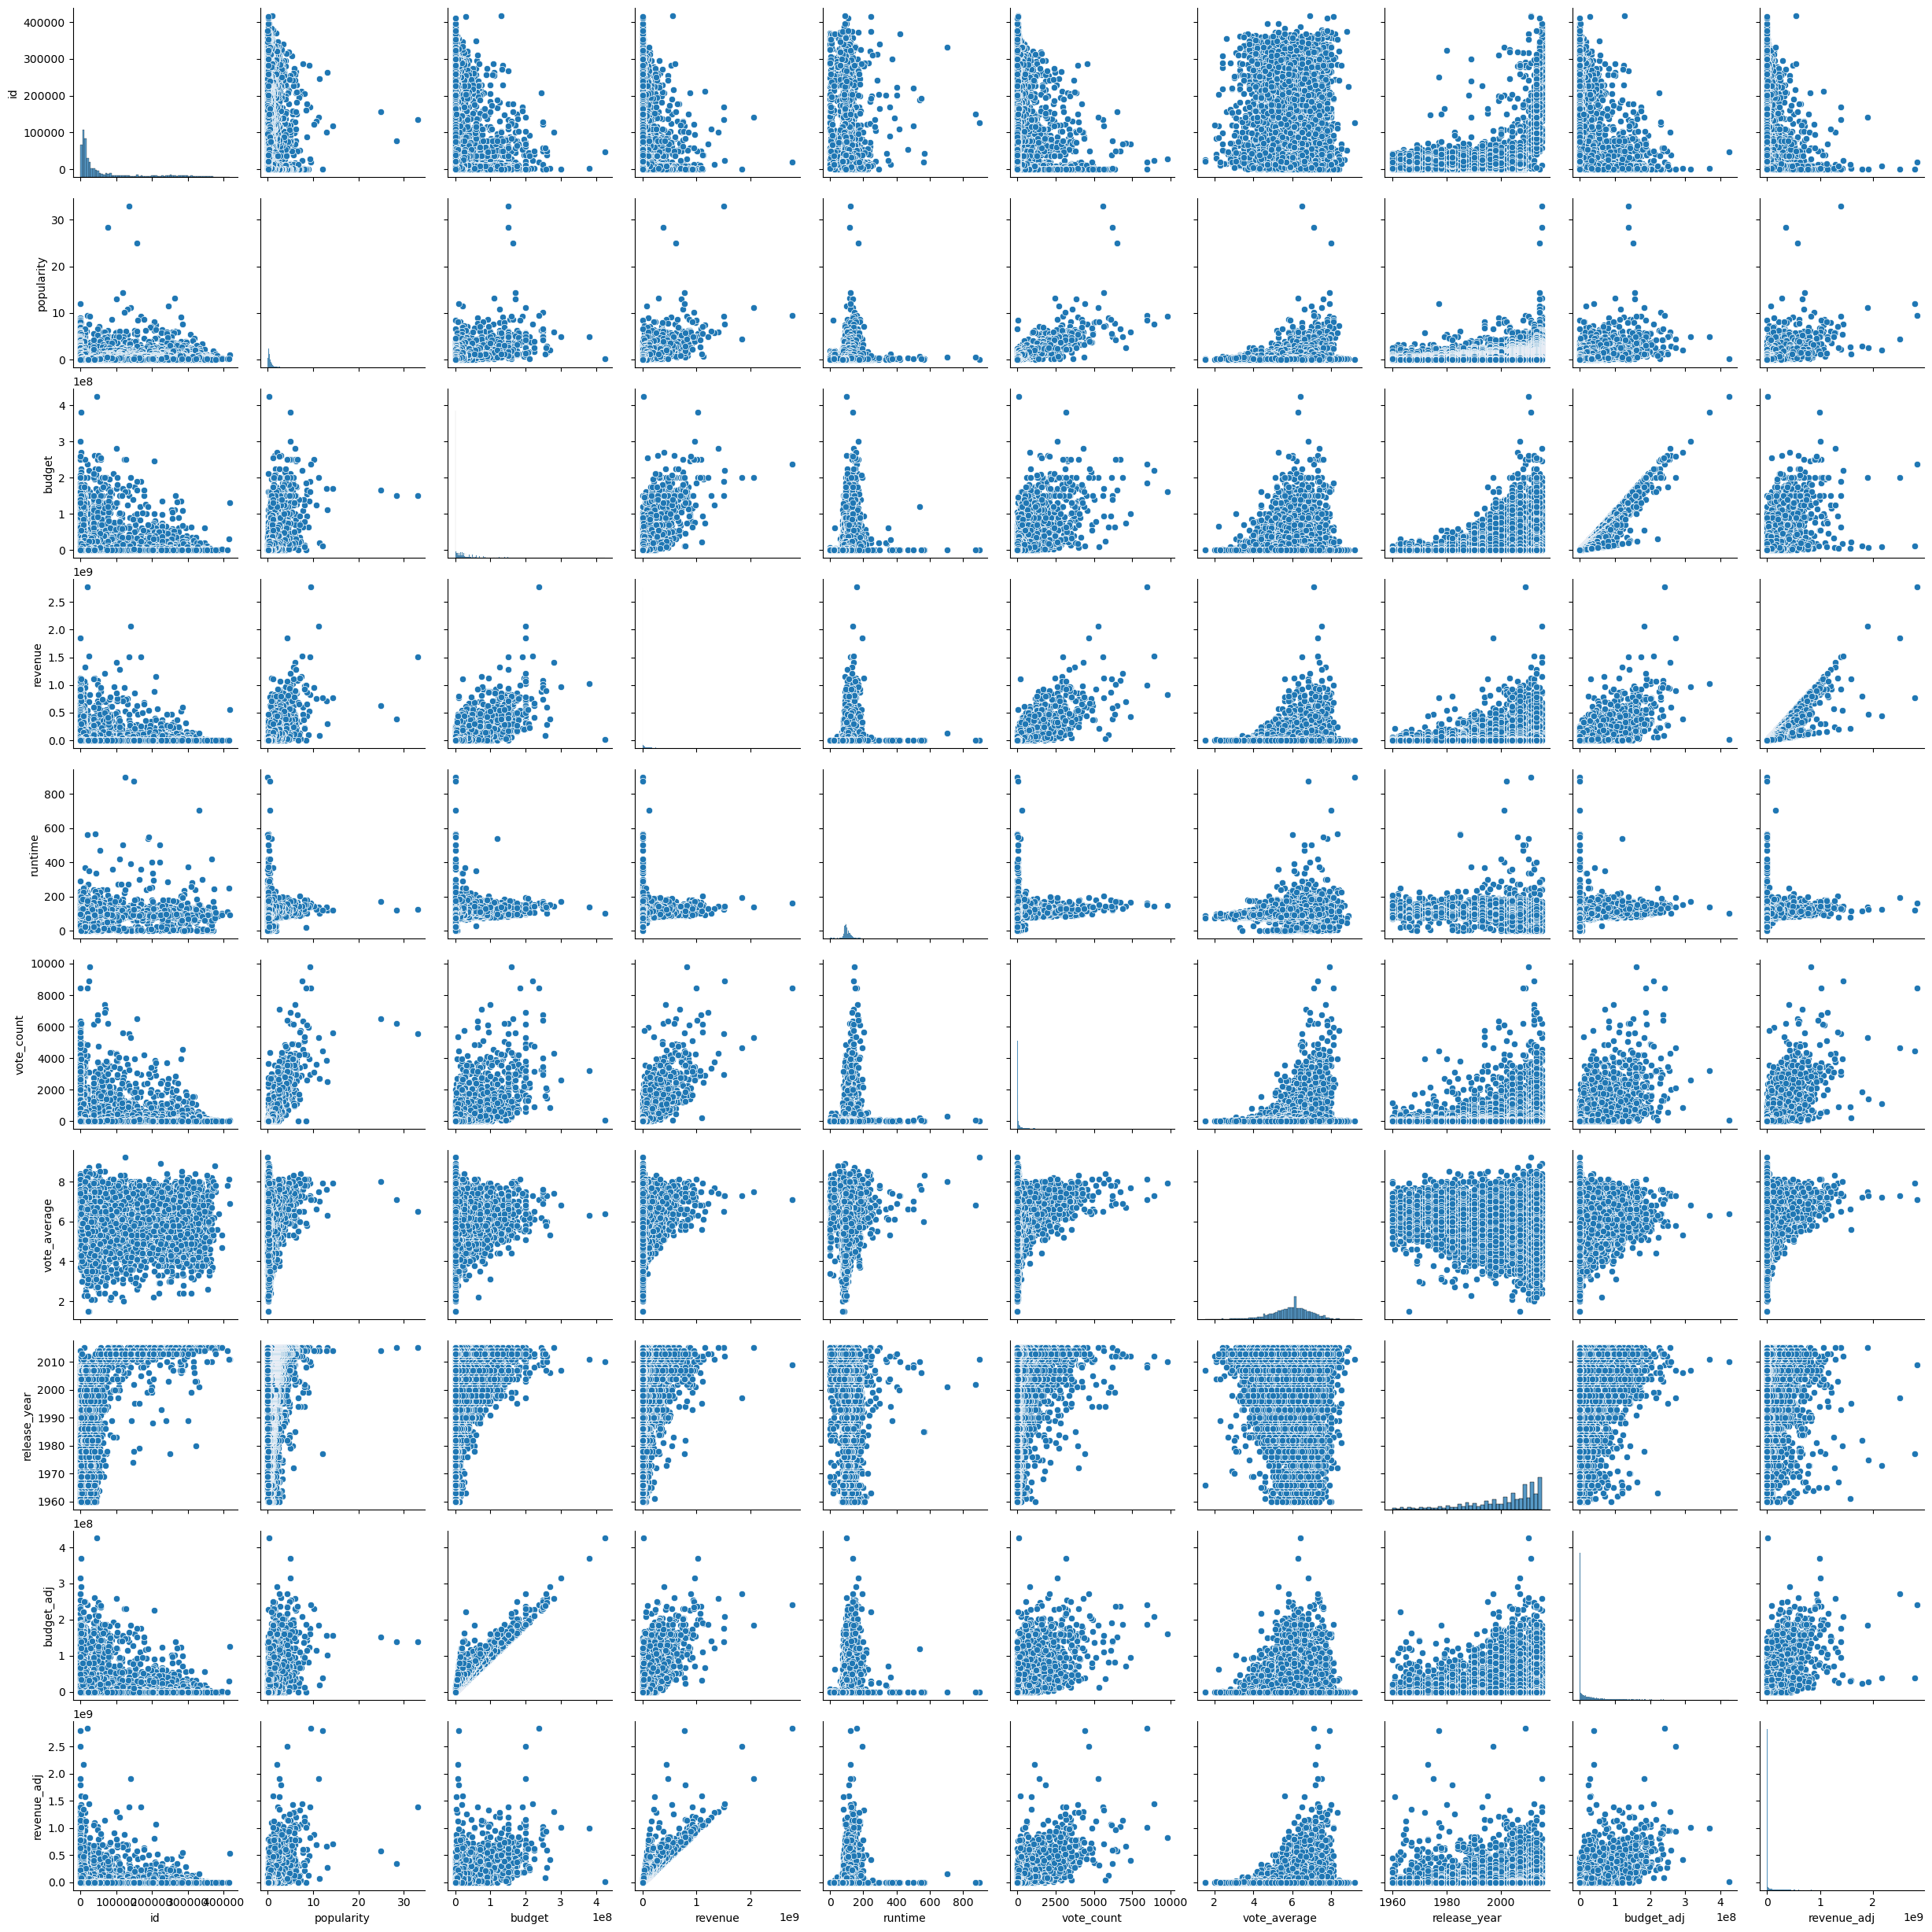

In [5]:
sns.pairplot(df,palette='bwr')

It is not very clear from the graphs the correlation between the data. So, use correlation matrix to explore the relationship between different features or variables of a dataset. A correlation matrix can help us to identify the variables that are highly correlated, which can be useful for feature selection, data preprocessing, and building predictive models.

<AxesSubplot:>

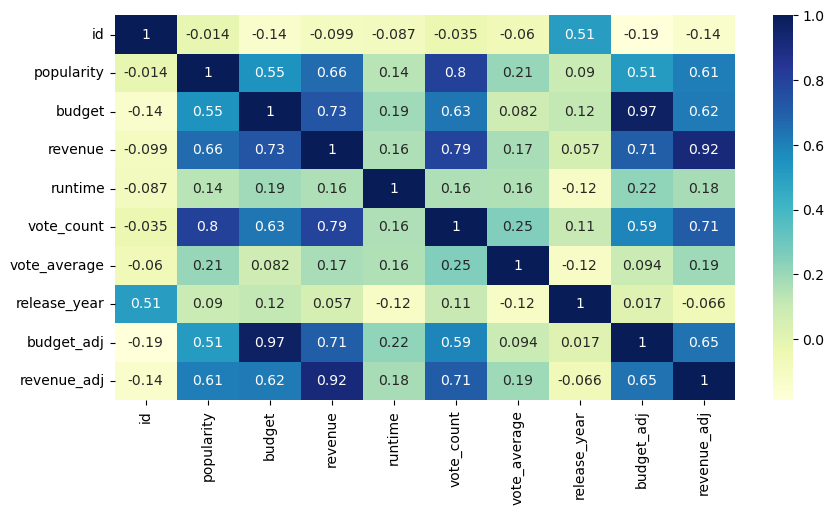

In [57]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

Based on the marix above, I would train my model using the following fields:

- Budget
- Vote count
- Budget adj
- Revenue adj

In [67]:
# Select the features and target variable
X = df[['budget', 'vote_count',  'budget_adj','revenue_adj']]
y = df['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the ratings on the testing data
predictions = model.predict(X_test)

The performance of the model can be assessed using metrics such as R-squared, mean squared error, and mean absolute error.

In [68]:
r2 = model.score(X_test, y_test)
print('R-squared: {}'.format(r2))

R-squared: 0.9176585081674539


R² value of 0.9176585081687898 indicates that linear regression model explains approximately 91.8% of the variance in the dependent variable. This is generally considered a good fit for a linear regression model, suggesting that the selected independent variables (budget, vote count, revenue_adj, budget_adj) have a strong relationship with the dependent variable (revenue).

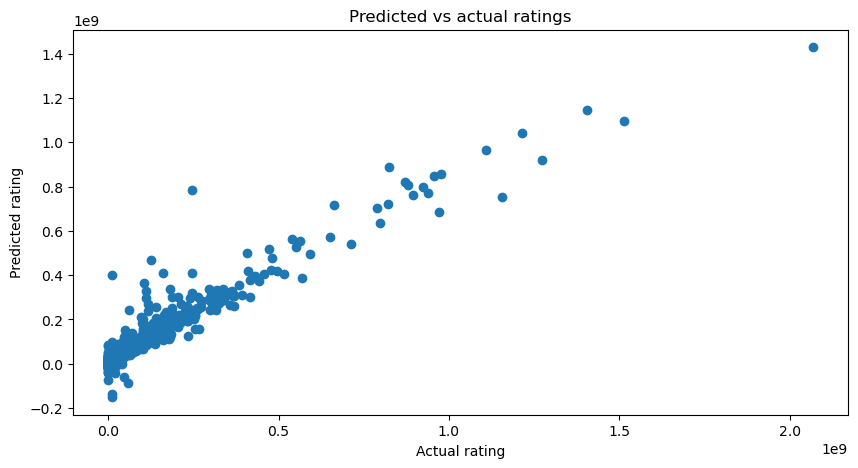

In [69]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.title('Predicted vs actual ratings')
plt.show()

To analyze where the model tends to fail, we can plot the residuals (difference between predicted and actual revenue) against the predicted revenue values. If there is a pattern in the residuals, it indicates that the model is not capturing some important information from the data. We can also analyze the feature importances to see which features are contributing the most to the revenue prediction.

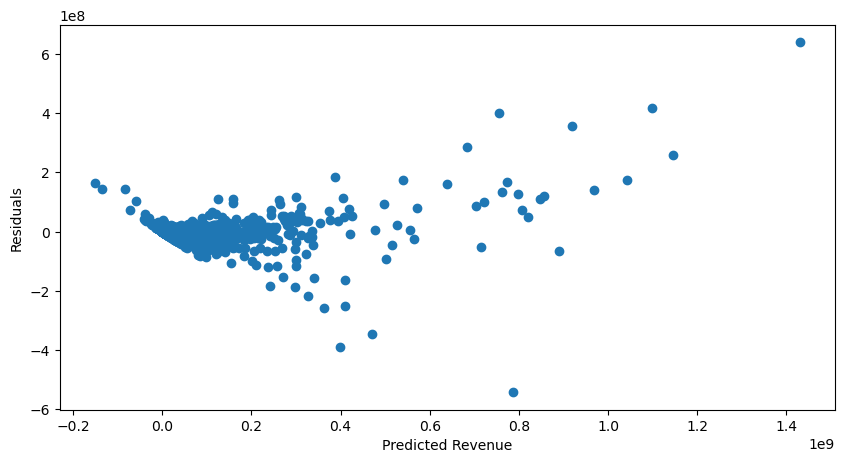

[ 2.72547232e+00  2.89409014e+04 -1.79648381e+00  5.59963337e-01]
Feature: 0, Score: 2.72547
Feature: 1, Score: 28940.90140
Feature: 2, Score: -1.79648
Feature: 3, Score: 0.55996


In [70]:
# Plot residuals against predicted revenue values
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.show()

# Analyze feature importances
importance = model.coef_
print(model.coef_)
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


These are the feature importances calculated by the linear regression model. The scores represent how much each feature contributes to the prediction of revenue. The higher the score, the more important the feature is in predicting the revenue.

In this case, it seems that 'vote_count' (feature 1) is the most important feature for predicting revenue, followed by 'budget' (feature 0) and 'revenue_adj' (feature 3). 'budget_adj' (feature 2) has a negative score, which means it has a negative impact on the revenue prediction.

Create new linear regression model without budget_adj.

In [71]:
# Select the features and target variable
X = df[['budget', 'vote_count','revenue_adj']]
y = df['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the ratings on the testing data
predictions = model.predict(X_test)

In [72]:
r2 = model.score(X_test, y_test)
print('R-squared: {}'.format(r2))

R-squared: 0.8978318325966186


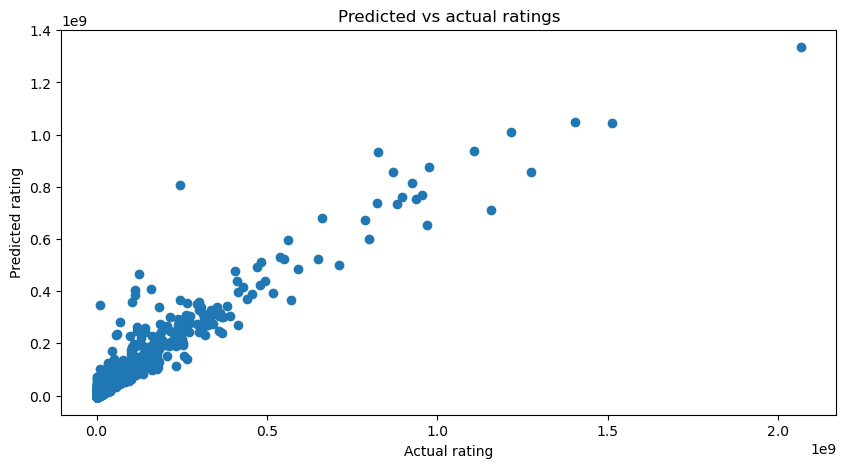

In [73]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.title('Predicted vs actual ratings')
plt.show()


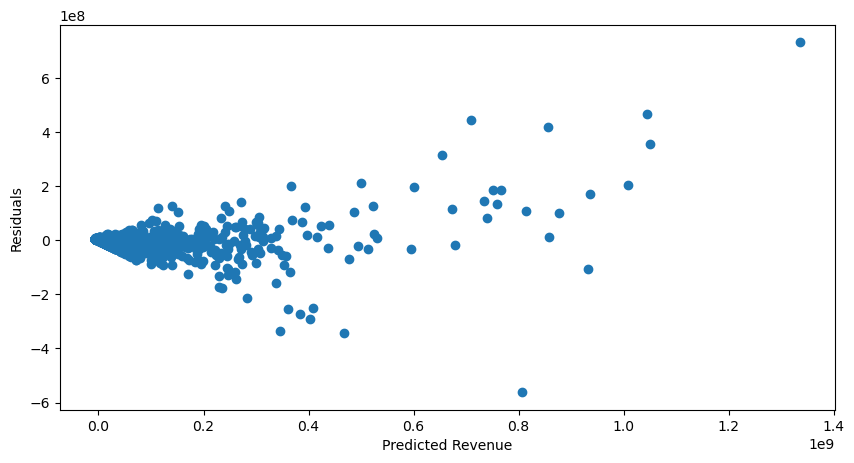

[8.08885235e-01 3.98993389e+04 5.09172470e-01]
Feature: 0, Score: 0.80889
Feature: 1, Score: 39899.33889
Feature: 2, Score: 0.50917


In [66]:
import matplotlib.pyplot as plt

# Plot residuals against predicted revenue values
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.show()

# Analyze feature importances
importance = model.coef_
print(model.coef_)
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))